In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
from sklearn.decomposition import PCA as p

In [30]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [31]:
pca = p(n_components=2)
X_r = pca.fit(X).transform(X)

In [32]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.92461621  0.05301557]


In [33]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

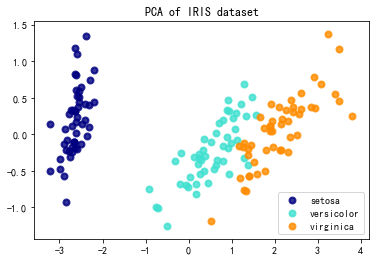

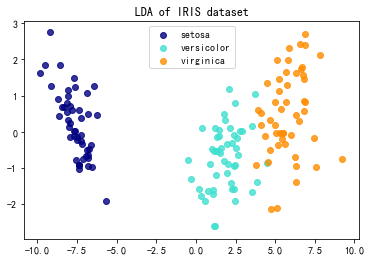

In [34]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

In [35]:
class PCA():
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, X):

        ## 减去均值
        X_scale = X - np.mean(X, axis=0, keepdims=True)

        ## 计算协方差
        X_cov = np.cov(X_scale.T)

        ## 求出特征值和特征矩阵
        _, variance, components  = np.linalg.svd(X_cov)

        ## 对产生的特征值进行排序后选择前k个
        index_feature = np.argsort(variance[::-1])[: self.n_components]

        ## 选择 前k 个最大成分
        self.explained_variance_ = variance[index_feature]
        self.components_ =  -components[index_feature, :]
        self.explained_variance_ratio_ = self.explained_variance_ / np.sum(variance) 
    
    def fit_transform(self, X):
        self.fit(X)
        X_transform = np.dot(X, self.components_.T)
        
        return X_transform
    
    def transform(self, X):
        X_transform = np.dot(X, self.components_.T)
        
        return X_transform



In [14]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [15]:
pca_ = PCA(n_components=2)
pca_.fit(X)

In [131]:
from scipy.linalg import norm